In [2]:
!pip install jovian --upgrade --quiet
import jovian

In [3]:
!pip install numpy --upgrade --quiet
import numpy as np
!pip install pandas --upgrade --quiet
import pandas as pd
!pip install matplotlib 
import matplotlib.pyplot as plt

In [4]:
project_name = "nudibranchs-image-species-identificaion"

In [5]:
import os

### Making a Custom Dataset!! 

In [6]:
import torch
from torch.utils.data import Dataset #to make a custom dataset
import torch.nn as nn #all neuarl network modules, nn.Linear, nn.conv2d, BatchNorm, Loss functions!
import torch.optim as optim   #for al optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F
import torchvision.transforms as transforms #transformations we can perform on our dataset!
import torchvision
from torch.utils.data import DataLoader, TensorDataset  #Gives easier dataset management and creates mini batches! #check the spelling!
from torch.utils.data import random_split


In [7]:
help(torch.utils.data)

Help on package torch.utils.data in torch.utils:

NAME
    torch.utils.data

PACKAGE CONTENTS
    _decorator
    _typing
    _utils (package)
    dataloader
    datapipes (package)
    dataset
    distributed
    sampler

CLASSES
    builtins.object
        torch.utils.data._decorator.functional_datapipe
        torch.utils.data._decorator.guaranteed_datapipes_determinism
        torch.utils.data._decorator.non_deterministic
        torch.utils.data._decorator.runtime_validation_disabled
        torch.utils.data.dataloader._DatasetKind
    typing.Generic(builtins.object)
        torch.utils.data.dataloader.DataLoader
        torch.utils.data.dataset.Dataset
            torch.utils.data.dataset.ConcatDataset
            torch.utils.data.dataset.IterableDataset
                torch.utils.data.dataset.ChainDataset
            torch.utils.data.dataset.Subset
            torch.utils.data.dataset.TensorDataset
        torch.utils.data.sampler.Sampler
            torch.utils.data.distributed

In [8]:
from skimage import io

In [9]:
help(io)

Help on package skimage.io in skimage:

NAME
    skimage.io - Utilities to read and write images in various formats.

DESCRIPTION
    The following plug-ins are available:
    
    ========== ==============================================================
    Plugin     Description
    ---------- --------------------------------------------------------------
    fits       FITS image reading via PyFITS
    gdal       Image reading via the GDAL Library (www.gdal.org)
    gtk        Fast image display using the GTK library
    simpleitk  Image reading and writing via SimpleITK
    tifffile   Load and save TIFF and TIFF-based images using tifffile.py
    matplotlib Display or save images using Matplotlib
    imageio    Image reading via the ImageIO Library
    pil        Image reading via the Python Imaging Library
    imread     Image reading and writing via imread
    qt         Fast image display using the Qt library
    ========== =======================================================

My Note: 

1. __init__ method: https://www.edureka.co/blog/init-in-python/#:~:text=__init__%20is%20one,the%20attributes%20of%20the%20class.
& https://www.geeksforgeeks.org/__init__-in-python/

__init__ is one of the reserved methods in Python. In object oriented programming, it is known as a constructor. The __init__ method can be called when an object is created from the class, and access is required to initialize the attributes of the class.

2. __len__ method: https://docs.python.org/release/2.7.3/reference/datamodel.html#special-method-lookup-for-new-style-classes
& 

3. __getitem__ method: https://www.xspdf.com/resolution/58548957.html

In [10]:
class NudibranchFlatwormDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations= pd.read_csv(csv_file)
        self.root_dir =root_dir
        self.transform= transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((120,120)),
            transforms.ToTensor()])
    def __len__(self):
        return len(self.annotations)
    def __getitem__(self, index):
        img_path=os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image=  io.imread(img_path)
        y_label= torch.tensor(int(self.annotations.iloc[index, 1]))
         
        if self.transform:
            image= self.transform(image)
            
        return (image, y_label)

My Note: 
 
1. module error in class function: https://stackoverflow.com/questions/14583761/typeerror-module-init-takes-at-most-2-arguments-3-given


My Note: To Resize dataset: 
https://discuss.pytorch.org/t/resizing-dataset/75620/6

My Note: Error check for resizing: https://stackoverflow.com/questions/32302180/typeerror-image-data-can-not-convert-to-float

In [11]:
import csv
help(csv)

Help on module csv:

NAME
    csv - CSV parsing and writing.

MODULE REFERENCE
    https://docs.python.org/3.7/library/csv
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides classes that assist in the reading and writing
    of Comma Separated Value (CSV) files, and implements the interface
    described by PEP 305.  Although many CSV files are simple to parse,
    the format is not formally defined by a stable specification and
    is subtle enough that parsing lines of a CSV file with something
    like line.split(",") is bound to fail.  The module supports three
    basic APIs: reading, writing, and registration of dialects.
    
    
    DIALECT REGISTRATION:
    
    Readers

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
nudi_data=pd.read_csv("/content/drive/MyDrive/Nudibranch/nudibranchs_flatworms_species_list.csv")
print(nudi_data)


           nudibranch__flatworm_name  targets
0       Chromodoris_elisabethina.jpg        0
1   Doriprismatica_atromarginata.jpg        0
2            Chromodoris_kuiteri.jpg        0
3             Phyllidiella_lizae.jpg        0
4              Glossodoris_vespa.jpg        0
5      Glossodoris_rufomarginata.jpg        0
6             Phyllidia_ocellata.jpg        0
7           Hypselodoris_obscura.jpg        0
8         Phyllidiella_pustulosa.jpg        0
9          Hypselodoris_jacksoni.jpg        0
10          Pteraeolidia_semperi.jpg        0
11          Thuridilla_splendens.jpg        0
12      Goniobranchus_splendidus.jpg        0
13        Sagaminopteron_ornatum.jpg        0
14                 Aplysia_argus.jpg        0
15                Costasiella_sp.jpg        0
16                   Acanthozoon.jpg        1
17                  Eurylepta_sp.jpg        1
18               Maritigrella_sp.jpg        1
19                  Planocerid_7.jpg        1
20            possibly_Stylochid.j

In [156]:
num_data =len(nudi_data)
num_data

31

In [157]:
from zipfile import ZipFile
help(ZipFile)

Help on class ZipFile in module zipfile:

class ZipFile(builtins.object)
 |  ZipFile(file, mode='r', compression=0, allowZip64=True, compresslevel=None)
 |  
 |  Class with methods to open, read, write, close, list zip files.
 |  
 |  z = ZipFile(file, mode="r", compression=ZIP_STORED, allowZip64=True,
 |              compresslevel=None)
 |  
 |  file: Either the path to the file, or a file-like object.
 |        If it is a path, the file will be opened and closed by ZipFile.
 |  mode: The mode can be either read 'r', write 'w', exclusive create 'x',
 |        or append 'a'.
 |  compression: ZIP_STORED (no compression), ZIP_DEFLATED (requires zlib),
 |               ZIP_BZIP2 (requires bz2) or ZIP_LZMA (requires lzma).
 |  allowZip64: if True ZipFile will create files with ZIP64 extensions when
 |              needed, otherwise it will raise an exception when this would
 |              be necessary.
 |  compresslevel: None (default for the given compression type) or an integer
 |      

In [161]:
file_name="nudis_flatworm_images.zip"

In [164]:
files=ZipFile(file_name)
files

<zipfile.ZipFile filename='nudis_flatworm_images.zip' mode='r'>

In [165]:
files.namelist()

['nudis_flatworm_images/',
 'nudis_flatworm_images/Acanthozoon.jpg',
 'nudis_flatworm_images/Aplysia_argus.jpg',
 'nudis_flatworm_images/Chromodoris_elisabethina.jpg',
 'nudis_flatworm_images/Chromodoris_kuiteri.jpg',
 'nudis_flatworm_images/Costasiella_sp.jpg',
 'nudis_flatworm_images/Doriprismatica_atromarginata.jpg',
 'nudis_flatworm_images/Eurylepta_sp.jpg',
 'nudis_flatworm_images/Glossodoris_rufomarginata.jpg',
 'nudis_flatworm_images/Glossodoris_vespa.jpg',
 'nudis_flatworm_images/Goniobranchus_splendidus.jpg',
 'nudis_flatworm_images/Hypselodoris_obscura.jpg',
 'nudis_flatworm_images/Maritigrella_sp.jpg',
 'nudis_flatworm_images/Phyllidia_ocellata.jpg',
 'nudis_flatworm_images/Phyllidiella_lizae.jpg',
 'nudis_flatworm_images/Phyllidiella_pustulosa.jpg',
 'nudis_flatworm_images/Planocerid_7.jpg',
 'nudis_flatworm_images/possibly_Stylochid.jpg',
 'nudis_flatworm_images/Pseudobiceros_hymanae.jpg',
 'nudis_flatworm_images/Pseudobiceros_hymanae2.jpg',
 'nudis_flatworm_images/Pseudoc

In [166]:
for file in files.infolist():
    print(file.filename, file.file_size, file.date_time)

nudis_flatworm_images/ 0 (2021, 11, 7, 1, 31, 24)
nudis_flatworm_images/Acanthozoon.jpg 132291 (2020, 12, 15, 20, 33, 42)
nudis_flatworm_images/Aplysia_argus.jpg 50848 (2020, 12, 15, 18, 40, 36)
nudis_flatworm_images/Chromodoris_elisabethina.jpg 54587 (2020, 12, 9, 16, 35, 42)
nudis_flatworm_images/Chromodoris_kuiteri.jpg 59319 (2020, 12, 9, 18, 2, 20)
nudis_flatworm_images/Costasiella_sp.jpg 318004 (2020, 12, 9, 11, 23, 28)
nudis_flatworm_images/Doriprismatica_atromarginata.jpg 60569 (2020, 12, 9, 18, 1, 14)
nudis_flatworm_images/Eurylepta_sp.jpg 26066 (2020, 12, 15, 20, 29, 42)
nudis_flatworm_images/Glossodoris_rufomarginata.jpg 63496 (2020, 12, 9, 18, 7, 30)
nudis_flatworm_images/Glossodoris_vespa.jpg 76215 (2020, 12, 9, 18, 5, 58)
nudis_flatworm_images/Goniobranchus_splendidus.jpg 69392 (2020, 12, 9, 18, 14, 36)
nudis_flatworm_images/Hypselodoris_obscura.jpg 56194 (2020, 12, 9, 18, 10, 48)
nudis_flatworm_images/Maritigrella_sp.jpg 17045 (2020, 12, 15, 20, 31, 52)
nudis_flatworm_ima

In [167]:
for file in files.namelist():
    print(file)

nudis_flatworm_images/
nudis_flatworm_images/Acanthozoon.jpg
nudis_flatworm_images/Aplysia_argus.jpg
nudis_flatworm_images/Chromodoris_elisabethina.jpg
nudis_flatworm_images/Chromodoris_kuiteri.jpg
nudis_flatworm_images/Costasiella_sp.jpg
nudis_flatworm_images/Doriprismatica_atromarginata.jpg
nudis_flatworm_images/Eurylepta_sp.jpg
nudis_flatworm_images/Glossodoris_rufomarginata.jpg
nudis_flatworm_images/Glossodoris_vespa.jpg
nudis_flatworm_images/Goniobranchus_splendidus.jpg
nudis_flatworm_images/Hypselodoris_obscura.jpg
nudis_flatworm_images/Maritigrella_sp.jpg
nudis_flatworm_images/Phyllidia_ocellata.jpg
nudis_flatworm_images/Phyllidiella_lizae.jpg
nudis_flatworm_images/Phyllidiella_pustulosa.jpg
nudis_flatworm_images/Planocerid_7.jpg
nudis_flatworm_images/possibly_Stylochid.jpg
nudis_flatworm_images/Pseudobiceros_hymanae.jpg
nudis_flatworm_images/Pseudobiceros_hymanae2.jpg
nudis_flatworm_images/Pseudoceros_cf_cruentus.jpg
nudis_flatworm_images/Pseudoceros_cf_stimpsoni.jpg
nudis_flat

In [168]:
#extracting
with ZipFile(file_name, "r") as zip:
    zip.printdir()
    print("processing.....")
    zip.extractall()
    print("process completed!")

File Name                                             Modified             Size
nudis_flatworm_images/                         2021-11-07 01:31:24            0
nudis_flatworm_images/Acanthozoon.jpg          2020-12-15 20:33:42       132291
nudis_flatworm_images/Aplysia_argus.jpg        2020-12-15 18:40:36        50848
nudis_flatworm_images/Chromodoris_elisabethina.jpg 2020-12-09 16:35:42        54587
nudis_flatworm_images/Chromodoris_kuiteri.jpg  2020-12-09 18:02:20        59319
nudis_flatworm_images/Costasiella_sp.jpg       2020-12-09 11:23:28       318004
nudis_flatworm_images/Doriprismatica_atromarginata.jpg 2020-12-09 18:01:14        60569
nudis_flatworm_images/Eurylepta_sp.jpg         2020-12-15 20:29:42        26066
nudis_flatworm_images/Glossodoris_rufomarginata.jpg 2020-12-09 18:07:30        63496
nudis_flatworm_images/Glossodoris_vespa.jpg    2020-12-09 18:05:58        76215
nudis_flatworm_images/Goniobranchus_splendidus.jpg 2020-12-09 18:14:36        69392
nudis_flatworm_imag

In [169]:
zip.printdir()

File Name                                             Modified             Size
nudis_flatworm_images/                         2021-11-07 01:31:24            0
nudis_flatworm_images/Acanthozoon.jpg          2020-12-15 20:33:42       132291
nudis_flatworm_images/Aplysia_argus.jpg        2020-12-15 18:40:36        50848
nudis_flatworm_images/Chromodoris_elisabethina.jpg 2020-12-09 16:35:42        54587
nudis_flatworm_images/Chromodoris_kuiteri.jpg  2020-12-09 18:02:20        59319
nudis_flatworm_images/Costasiella_sp.jpg       2020-12-09 11:23:28       318004
nudis_flatworm_images/Doriprismatica_atromarginata.jpg 2020-12-09 18:01:14        60569
nudis_flatworm_images/Eurylepta_sp.jpg         2020-12-15 20:29:42        26066
nudis_flatworm_images/Glossodoris_rufomarginata.jpg 2020-12-09 18:07:30        63496
nudis_flatworm_images/Glossodoris_vespa.jpg    2020-12-09 18:05:58        76215
nudis_flatworm_images/Goniobranchus_splendidus.jpg 2020-12-09 18:14:36        69392
nudis_flatworm_imag

My Note:To read images:  https://www.geeksforgeeks.org/reading-images-in-python/

In [170]:
os.listdir()

['.config',
 'nudibranchs_flatworms_species_list.csv',
 '.ipynb_checkpoints',
 'nudis_flatworm_images',
 'nudis_flatworm_images.zip',
 'drive',
 'sample_data']

In [171]:
os.listdir("./nudis_flatworm_images")

['unknown_flatworm.jpg',
 'possibly_Stylochid.jpg',
 'Thysanozoon_nigropapillosum.jpg',
 'Glossodoris_vespa.jpg',
 'Pseudobiceros_hymanae2.jpg',
 'Chromodoris_kuiteri.jpg',
 'Planocerid_7.jpg',
 'Stylochid_8.jpg',
 'Pteraeolidia_semperi.jpg',
 'Aplysia_argus.jpg',
 'Maritigrella_sp.jpg',
 'Phyllidia_ocellata.jpg',
 'Pseudocerotidae.jpg',
 'Phyllidiella_lizae.jpg',
 'Acanthozoon.jpg',
 'Thuridilla_splendens.jpg',
 'Pseudoceros_cf_cruentus.jpg',
 'Hypselodoris_jacksoni.jpg',
 'Goniobranchus_splendidus.jpg',
 'Eurylepta_sp.jpg',
 'Pseudobiceros_hymanae.jpg',
 'Pseudoceros_cf_stimpsoni.jpg',
 'Pseudocerotidae_2.jpg',
 'Doriprismatica_atromarginata.jpg',
 'Glossodoris_rufomarginata.jpg',
 'Phyllidiella_pustulosa.jpg',
 'Sagaminopteron_ornatum.jpg',
 'Tytthosoceros_sp_2.jpg',
 'Hypselodoris_obscura.jpg',
 'Costasiella_sp.jpg',
 'Chromodoris_elisabethina.jpg']

In [172]:
file_list=os.listdir("./nudis_flatworm_images")

In [173]:
dataset =NudibranchFlatwormDataset(csv_file="nudibranchs_flatworms_species_list.csv", root_dir="nudis_flatworm_images",
                                  transform= transforms.ToTensor())

My Note: 

1. unicode error: https://stackoverflow.com/questions/37400974/unicode-error-unicodeescape-codec-cant-decode-bytes-in-position-2-3-trunca

In [104]:
help(jovian)

Help on package jovian:

NAME
    jovian

PACKAGE CONTENTS
    __main__
    _flavor
    _version
    callbacks (package)
    pythondsa (package)
    testing (package)
    utils (package)

VERSION
    0.2.41

FILE
    /usr/local/lib/python3.7/dist-packages/jovian/__init__.py




In [174]:
img, label =dataset[0]
print(img.shape, label)
img

torch.Size([3, 120, 120]) tensor(0)


tensor([[[0.3882, 0.4392, 0.4980,  ..., 0.2118, 0.2157, 0.2471],
         [0.4784, 0.5333, 0.5804,  ..., 0.2039, 0.2275, 0.2588],
         [0.5647, 0.6039, 0.6353,  ..., 0.2118, 0.2235, 0.2549],
         ...,
         [0.3020, 0.2667, 0.2275,  ..., 0.3451, 0.3059, 0.2902],
         [0.3098, 0.2784, 0.2471,  ..., 0.3373, 0.2902, 0.2706],
         [0.3176, 0.2902, 0.2588,  ..., 0.3373, 0.3098, 0.2941]],

        [[0.3451, 0.4118, 0.4588,  ..., 0.1569, 0.1529, 0.1843],
         [0.4235, 0.4863, 0.5294,  ..., 0.1529, 0.1647, 0.1882],
         [0.4941, 0.5255, 0.5647,  ..., 0.1686, 0.1686, 0.1961],
         ...,
         [0.2941, 0.2588, 0.2196,  ..., 0.3098, 0.2863, 0.2745],
         [0.3020, 0.2706, 0.2392,  ..., 0.2980, 0.2667, 0.2510],
         [0.2980, 0.2745, 0.2471,  ..., 0.3059, 0.2784, 0.2627]],

        [[0.3647, 0.4510, 0.4980,  ..., 0.1490, 0.1412, 0.1686],
         [0.4588, 0.5176, 0.5490,  ..., 0.1608, 0.1647, 0.1843],
         [0.5216, 0.5451, 0.5725,  ..., 0.1882, 0.1843, 0.

In [175]:
img.size()

torch.Size([3, 120, 120])

In [176]:
img1, label =dataset[1]
print(img1.shape, label)
img1

torch.Size([3, 120, 120]) tensor(0)


tensor([[[0.3922, 0.3216, 0.2902,  ..., 0.0039, 0.0667, 0.2627],
         [0.4784, 0.3961, 0.3373,  ..., 0.0118, 0.0941, 0.2784],
         [0.5647, 0.5059, 0.4314,  ..., 0.0235, 0.1216, 0.2941],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.6392, 0.7294, 0.7020],
         [0.0000, 0.0000, 0.0000,  ..., 0.6784, 0.7098, 0.7255],
         [0.0000, 0.0000, 0.0000,  ..., 0.7255, 0.7255, 0.7294]],

        [[0.3020, 0.2157, 0.1882,  ..., 0.0039, 0.0667, 0.2157],
         [0.3686, 0.2902, 0.2627,  ..., 0.0118, 0.0941, 0.2275],
         [0.4549, 0.3961, 0.3373,  ..., 0.0275, 0.1098, 0.2431],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.5490, 0.6510, 0.6471],
         [0.0000, 0.0000, 0.0000,  ..., 0.6000, 0.6392, 0.6784],
         [0.0000, 0.0000, 0.0000,  ..., 0.6431, 0.6392, 0.6667]],

        [[0.1451, 0.0745, 0.0902,  ..., 0.0039, 0.0353, 0.1451],
         [0.2118, 0.1451, 0.1412,  ..., 0.0078, 0.0471, 0.1608],
         [0.2745, 0.2235, 0.2000,  ..., 0.0118, 0.0706, 0.

In [177]:
img2, label =dataset[2]
print(img2)
print(img2.size())

tensor([[[0.4824, 0.4275, 0.4000,  ..., 0.8118, 0.8471, 0.8863],
         [0.4510, 0.4157, 0.3961,  ..., 0.7451, 0.7804, 0.8863],
         [0.4824, 0.4353, 0.4196,  ..., 0.6980, 0.7137, 0.7961],
         ...,
         [0.3922, 0.2980, 0.5098,  ..., 0.6627, 0.7608, 0.6667],
         [0.5451, 0.4314, 0.5529,  ..., 0.5725, 0.7725, 0.5882],
         [0.6235, 0.6510, 0.6157,  ..., 0.3804, 0.6471, 0.5843]],

        [[0.5529, 0.5059, 0.4824,  ..., 0.8353, 0.8667, 0.9569],
         [0.4941, 0.4784, 0.5098,  ..., 0.7176, 0.7294, 0.9098],
         [0.5176, 0.4667, 0.5216,  ..., 0.6157, 0.6314, 0.6980],
         ...,
         [0.3451, 0.1882, 0.3098,  ..., 0.6627, 0.8157, 0.6706],
         [0.4784, 0.3176, 0.3686,  ..., 0.6118, 0.8941, 0.6353],
         [0.5843, 0.6000, 0.5529,  ..., 0.3922, 0.7804, 0.6627]],

        [[0.5176, 0.4588, 0.4706,  ..., 0.8235, 0.8471, 0.9255],
         [0.5059, 0.4784, 0.5294,  ..., 0.6824, 0.7176, 0.8627],
         [0.5020, 0.4353, 0.4941,  ..., 0.5765, 0.6235, 0.

In [178]:
img28, label=dataset[28]
print(img28.shape,label )
img28

torch.Size([3, 120, 120]) tensor(1)


tensor([[[0.5412, 0.4824, 0.6549,  ..., 0.5412, 0.5098, 0.5176],
         [0.5765, 0.4980, 0.6588,  ..., 0.5961, 0.5059, 0.5333],
         [0.6353, 0.6196, 0.7373,  ..., 0.6118, 0.5608, 0.5765],
         ...,
         [0.1686, 0.2196, 0.2118,  ..., 0.5922, 0.5765, 0.5451],
         [0.1882, 0.2941, 0.3412,  ..., 0.5529, 0.5804, 0.6078],
         [0.2118, 0.3569, 0.4235,  ..., 0.6039, 0.6039, 0.6196]],

        [[0.5176, 0.4549, 0.6275,  ..., 0.5176, 0.4824, 0.4980],
         [0.5490, 0.4667, 0.6314,  ..., 0.5647, 0.4784, 0.5098],
         [0.6078, 0.5922, 0.7098,  ..., 0.5843, 0.5333, 0.5490],
         ...,
         [0.1412, 0.1843, 0.1765,  ..., 0.5686, 0.5490, 0.5176],
         [0.1569, 0.2588, 0.3020,  ..., 0.5294, 0.5529, 0.5804],
         [0.1804, 0.3216, 0.3843,  ..., 0.5804, 0.5765, 0.5922]],

        [[0.4078, 0.3686, 0.5765,  ..., 0.4745, 0.4431, 0.4431],
         [0.4745, 0.4039, 0.5882,  ..., 0.5412, 0.4510, 0.4706],
         [0.5686, 0.5451, 0.6706,  ..., 0.4980, 0.4863, 0.

In [179]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mrittrukhuda/nudibranchs-image-species-identificaion


'https://jovian.ai/mrittrukhuda/nudibranchs-image-species-identificaion'

### Setting training and testing dataset!

In [181]:
val_percent=0.1

In [182]:
num_data* val_percent

3.1

In [183]:
int(num_data*val_percent)

3

In [184]:
val_size=int(num_data*val_percent)
val_size

3

In [185]:
train_size= num_data -val_size
train_size

28

In [186]:
train_ds, test_ds = random_split(dataset, [train_size, val_size])

###  Creating a batch_size & Setting training & testing dataloader!

In [116]:
batch_size =2

In [180]:
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(*args, **kwds)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Args:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Iterable``

In [187]:
train_dl= DataLoader(train_ds, batch_size, shuffle=True)    

test_dl= DataLoader(test_ds, batch_size, shuffle=True)

# make sure to chec the speelling...DataLoader has a capital D and a capital L! or it will throw "module is not callable error!"

In [188]:
!pip install opencv-python
import cv2

In [189]:
def show_example(img, label):
  plt.imshow(img.permute(1, 2, 0))

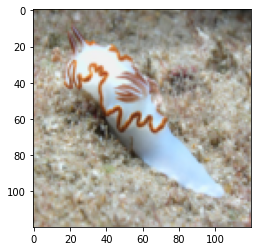

In [190]:
img, label =dataset[5]
show_example(img, label)       #finalllyyyyyyy # woooowwww

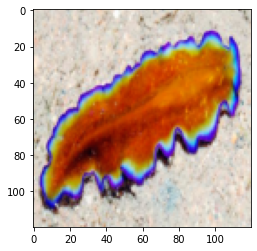

In [191]:
img, label=dataset[30]
show_example(img, label)     #looking goooodddd!!!

In [192]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mrittrukhuda/nudibranchs-image-species-identificaion


'https://jovian.ai/mrittrukhuda/nudibranchs-image-species-identificaion'

### Defining the Model(Convolutional Neural Network)

In [193]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [194]:
#reminder: input =3 channels and output=32 channels! goes on!
class NudiFlatwormCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  
            #output: 32 X 120 X 120        
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            #output: 64 X 120 X 120
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 60 x 60

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            #output: 128 X 60 X 60
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            #output: 128 X 60 X 60
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 30x 30

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            #output: 256 X 30 X 30
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            #output: 256 X 30 X 30
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 15 x 15

            nn.Flatten(), 
            nn.Linear(256*15*15, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 2))
        
    def forward(self, xb):
        return self.network(xb)

In [195]:
model =NudiFlatwormCnnModel()
model

NudiFlatwormCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=57600, out_features=512, bias=True)
    (17): ReLU()
    (18): Linear(in

In [196]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([2, 3, 120, 120])
out.shape: torch.Size([2, 2])
out[0]: tensor([-0.0219, -0.0329], grad_fn=<SelectBackward>)


In [197]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mrittrukhuda/nudibranchs-image-species-identificaion


'https://jovian.ai/mrittrukhuda/nudibranchs-image-species-identificaion'

## Setting some functions to move the model & data to GPU if available!

In [198]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

My Note: To know more about the isinstance() function: https://www.w3schools.com/python/ref_func_isinstance.asp

The isinstance() function returns True if the specified object is of the specified type, otherwise False.

If the type parameter is a tuple, this function will return True if the object is one of the types in the tuple. 

In [199]:
device = get_default_device()   #run on google colab for GPU!
device

device(type='cuda')

My Note: 1. DeviceDataLoader for automatically transferring batches of data to the GPU (if available), 2. and to_device to move our model to the GPU (if available).

In [200]:
train_dl = DeviceDataLoader(train_dl, device)    #transferring train & validation dataloaders along with the model!
val_dl = DeviceDataLoader(test_dl, device)

In [201]:
model=to_device(NudiFlatwormCnnModel(), device)
model

NudiFlatwormCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=57600, out_features=512, bias=True)
    (17): ReLU()
    (18): Linear(in

## Training The Model!!!

My NotE: to know more about optimizer and optimizer.step(): https://pytorch.org/docs/stable/optim.html

In [202]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [203]:
history=evaluate(model, val_dl)
history

{'val_acc': 0.5, 'val_loss': 0.693175196647644}

In [206]:
epochs = 10
max_lr = 0.001

#opt_func = torch.optim.Adam

In [210]:
%%time
history = fit(epochs, max_lr, model, train_dl, val_dl, opt_func=opt_func)

Epoch [0], train_loss: 0.2546, val_loss: 0.2523, val_acc: 0.7500
Epoch [1], train_loss: 1.5242, val_loss: 1.2811, val_acc: 0.5000
Epoch [2], train_loss: 0.5342, val_loss: 0.0009, val_acc: 1.0000
Epoch [3], train_loss: 0.3302, val_loss: 0.1667, val_acc: 1.0000
Epoch [4], train_loss: 0.2123, val_loss: 0.3820, val_acc: 0.5000
Epoch [5], train_loss: 0.1892, val_loss: 0.0586, val_acc: 1.0000
Epoch [6], train_loss: 0.0491, val_loss: 0.0620, val_acc: 1.0000
Epoch [7], train_loss: 0.0094, val_loss: 0.0010, val_acc: 1.0000
Epoch [8], train_loss: 0.0004, val_loss: 0.0002, val_acc: 1.0000
Epoch [9], train_loss: 0.0001, val_loss: 0.0005, val_acc: 1.0000
CPU times: user 7.34 s, sys: 84.1 ms, total: 7.43 s
Wall time: 7.4 s


In [209]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mrittrukhuda/nudibranchs-image-species-identificaion


'https://jovian.ai/mrittrukhuda/nudibranchs-image-species-identificaion'

In [211]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

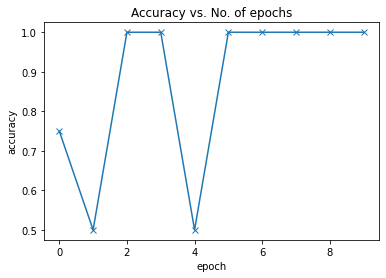

In [212]:
plot_accuracies(history)

In [213]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

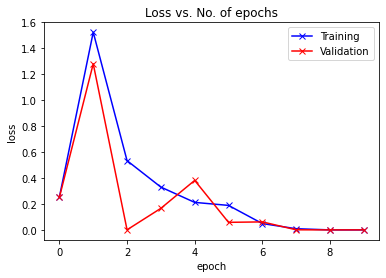

In [214]:
plot_losses(history)

In [217]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

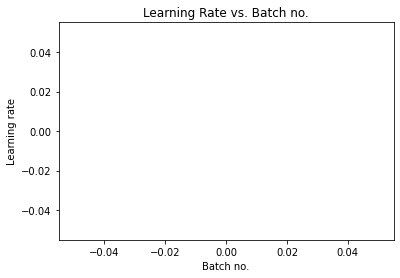

In [218]:
plot_lrs(history)

## Testing with individual images!

In [225]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds[preds[0].item()]

Label: (tensor([[[0.5922, 0.6039, 0.6118,  ..., 0.5569, 0.5804, 0.5882],
         [0.6039, 0.6157, 0.6157,  ..., 0.5725, 0.6000, 0.6078],
         [0.6118, 0.6353, 0.6353,  ..., 0.5843, 0.6157, 0.6275],
         ...,
         [0.4196, 0.4353, 0.4431,  ..., 0.2118, 0.1373, 0.0471],
         [0.4196, 0.4000, 0.4039,  ..., 0.1765, 0.1882, 0.1412],
         [0.4235, 0.4078, 0.4706,  ..., 0.1176, 0.1804, 0.2863]],

        [[0.5255, 0.5412, 0.5569,  ..., 0.4392, 0.4824, 0.5059],
         [0.5333, 0.5490, 0.5490,  ..., 0.4588, 0.5059, 0.5294],
         [0.5490, 0.5686, 0.5569,  ..., 0.4863, 0.5255, 0.5490],
         ...,
         [0.4824, 0.4627, 0.4510,  ..., 0.2745, 0.2000, 0.0980],
         [0.4314, 0.4353, 0.4471,  ..., 0.1647, 0.1490, 0.1176],
         [0.4196, 0.4196, 0.4902,  ..., 0.1098, 0.1255, 0.2431]],

        [[0.5137, 0.5216, 0.5176,  ..., 0.4275, 0.4706, 0.5059],
         [0.5255, 0.5216, 0.4980,  ..., 0.4392, 0.4824, 0.5176],
         [0.5176, 0.5176, 0.4784,  ..., 0.4588, 0.

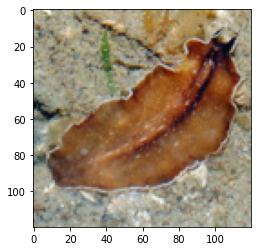

In [229]:
img, label = test_ds[2]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds[label], ', Predicted:', predict_image(img, model));

### First & Foremost Question: What are Nudibranchs/ Nudis/ Sea Slug?

Nudibranchs are mollusks, an order of marine gastropods(snails), they are soft-bodied, often colourful, marine snails that lack a shell!

About Their Population: Unknown!There are over 3000 different kinds of species all over the world and new ones are getting identified daily.

COMMON NAME: Nudibranchs

SCIENTIFIC NAME: Nudibranchia

TYPE: Invertebrates

DIET: Carnivore

AVERAGE LIFE SPAN IN THE WILD: Up to 1 years

SIZE: 0.25 to 12 inches

WEIGHT: Up to 3.3 pounds

### Scientific Classifiaction!
Kingdom: Animalia

Phylum: Mollusca

Class: Gastropoda

Subclass: Heterobranchia

Order: Opisthobranchia

suborder: Nudibranchia

### Some websites you wanna check which  i follow :
1. http://www.nudibranch.com.au/specieslist.html(based on Indo-Pacific, Australia)
2. https://www.nationalgeographic.com/animals/invertebrates/group/nudibranchs/
3. https://www.thoughtco.com/facts-about-nudibranchs-2291859
4. http://svocelot.com/Underwater/Nudibranchs.htm
5. https://magicoceans.online/nudibranchs 
6. http://www.seaslugforum.net/

#### To read PDF documnetation!


In [ ]:
import matplotlib.image as mpimg

### Note To Myself: 
In this notebook i have choosen few species to work with...depending on their visuality and color patterens!


### Nudibranch Types and Body parts!
"There are two main types of nudibranchs: dorid nudibranchs look fairly smooth, with a tuft of feather-like gills toward the back of the animal that are used to breathe. Aeolid nudibranchs instead breathe with organs called cerata covering their backs."  source: https://ocean.si.edu/ocean-life/invertebrates/collage-nudibranch-colors

"This large group can be divided into four main types (Suborders) on the basis of their general appearance. The harlequin nudibranchs (Doridaceans) are by far the most numerous. Most are characterized by the combination of a pair of tentacles (rhinophores) on top of the head and a tuft of feathery gills on the rear part of the back. However, certain species, known as phyllidiids, lack conspicuous gills and have lumpy ridges on the back. The Tubercular nudibranchs (Aeolidaceans) are second in abundance and the easiest group to recognize. They are covered with numerous finger-like appendages. The Back gilled nudibranchs (Dendrotaceans) have several feathery gills along each side of the back, as well as a cup-like sheath around each tentacle on top of the head. The last group, the Veiled nudibranchs (Arminaceans) is characterized by an expanded fleshy lobe on the head and longitudinal ridges along the back." source:http://www.nudibranch.com.au/aboutnudibranchs.html


In [ ]:
# nudi body parts!
mpimg.imread("nudi-body-parts.png")

In [ ]:
#to know the body parts of common nudi!
nudi_body_parts_img=mpimg.imread("nudi-body-parts.png")


In [ ]:
#just to have a glance about the appearence...of two types of nudi 

nudi_body_parts_img_plot= plt.imshow(nudi_body_parts_img)   

In [ ]:
#Nudi species 1
mpimg.imread("Doriprismatica_Atromarginata.jpg")

#### Note: all imgaes have the dtype=uint8

In [ ]:
doriprismatica_img=mpimg.imread("Doriprismatica_Atromarginata.jpg")

In [ ]:
doriprismatica_img_plot=plt.imshow(doriprismatica_img)

In [ ]:
doriprismatica_img.shape

In [ ]:
#Nudi species 2
goniobranchus_s_img= mpimg.imread("Goniobranchus_Splendidus.jpg")

In [ ]:
goniobranchus_s_img_plot=plt.imshow(goniobranchus_s_img)

In [ ]:
goniobfranchus_s_img.shape

In [ ]:
#Nudi species 3
costasiella_img= mpimg.imread("Costasiella_sp.jpg")

In [ ]:
costasiella_img_plot= plt.imshow(costasiella_img)

In [ ]:
costasiella_img.shape

In [ ]:
#Nudi Species 4
chromodoris_img=mpimg.imread("Chromodoris_Elizabethina.jpg")

In [ ]:
chromodoris_img_plot =plt.imshow(chromodoris_img)

In [ ]:
chromodoris_img.shape

In [ ]:
#Nudi Species 5
phyllidia_img=mpimg.imread("Phyllidia_Ocellata.jpg")

In [ ]:
phyllidia_img_plot= plt.imshow(phyllidia_img)

In [ ]:
phyllidia_img.shape

In [ ]:
jovian.commit(project=project_name, 
              file=["nudi-body-parts.png"],
              file1=['Doriprismatica_Atromarginata.jpg'],
              file2=["Goniobranchus_Splendidus.jpg"], 
              file3=["Costasiella_sp.jpg"], 
              file4=["Chromodoris_Elizabethina.jpg"],
              file5=["Phyllidia_Ocellata.jpg"],
              file6= ["Nudibranch_Species_List.pdf"])

In [ ]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:

chromodoris_img.astype("float32")

In [ ]:
tensor_img_chromodoris=torch.from_numpy(chromodoris_img.astype("float32"))
tensor_img_chromodoris

In [ ]:
tensor_img_phyllidia = torch.from_numpy(phyllidia_img.astype("float32"))
tensor_img_phyllidia

In [ ]:
tensor_img_costasiella=torch.from_numpy(costasiella_img)
tensor_img_costasiella

In [ ]:
tensor_img_goniobranchus_s =torch.from_numpy(goniobranchus_s_img.astype("float32"))
tensor_img_goniobranchus_s

In [ ]:
tensor_img_doriprismatica =torch.from_numpy(doriprismatica_img)